In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(
    "F:\\Mn\\MN_Learn\\Data_Analysis\\Bikeshare_Trips\\bikeshare_trips.csv"
)

In [3]:
df

,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,subscriber_type
0,1235850,1540,2016-06-11 08:19:00.000000 UTC,San Jose Diridon Caltrain Station,2,2016-06-11 08:45:00.000000 UTC,San Jose Diridon Caltrain Station,2,124,15206,Customer
1,1219337,6324,2016-05-29 12:49:00.000000 UTC,San Jose Diridon Caltrain Station,2,2016-05-29 14:34:00.000000 UTC,San Jose Diridon Caltrain Station,2,174,55416,Customer
2,793762,115572,2015-06-04 09:22:00.000000 UTC,San Jose Diridon Caltrain Station,2,2015-06-05 17:28:00.000000 UTC,San Jose Diridon Caltrain Station,2,190,95391,Customer
3,453845,54120,2014-09-15 16:53:00.000000 UTC,San Jose Diridon Caltrain Station,2,2014-09-16 07:55:00.000000 UTC,San Jose Diridon Caltrain Station,2,127,81,Customer
4,1245113,5018,2016-06-17 20:08:00.000000 UTC,San Jose Diridon Caltrain Station,2,2016-06-17 21:32:00.000000 UTC,San Jose Diridon Caltrain Station,2,153,95070,Customer
...,...,...,...,...,...,...,...,...,...,...,...
55260,866863,233,2015-07-29 09:07:00.000000 UTC,Mountain View Caltrain Station,28,2015-07-29 09:11:00.000000 UTC,Mountain View City Hall,27,577,94103,Subscriber
55261,1337326,238,2016-08-31 09:02:00.000000 UTC,Mountain View Caltrain Station,28,2016-08-31 09:06:00.000000 UTC,Mountain View City Hall,27,254,94103,Subscriber
55262,823563,241,2015-06-26 09:50:00.000000 UTC,Mountain View Caltrain Station,28,2015-06-26 09:54:00.000000 UTC,Mountain View City Hall,27,215,94103,Subscriber
55263,1333978,249,2016-08-29 08:50:00.000000 UTC,Mountain View Caltrain Station,28,2016-08-29 08:54:00.000000 UTC,Mountain View City Hall,27,10,94103,Subscriber


In [4]:
import pyodbc as odbc

In [5]:
driver = 'SQL Server'  # Or 'ODBC Driver 17 for SQL Server' if available
server = 'localhost\\SQLEXPRESS'  # Use double backslashes
database = 'BikeShareTrips'

try:
    conn = odbc.connect(
        f'DRIVER={{{driver}}};'
        f'SERVER={server};'
        f'DATABASE={database};'
        'Trusted_Connection=yes;'
    )
    
    cursor = conn.cursor()
    cursor.execute("SELECT GETDATE()")
    print(cursor.fetchone())
    print("✅ Connected to SQL Server")
except Exception as e:
    print("❌ Connection failed:", e)

(datetime.datetime(2025, 6, 21, 10, 55, 43, 730000),)
✅ Connected to SQL Server


In [6]:
print(odbc.drivers())

['SQL Server', 'SQL Server Native Client RDA 11.0', 'ODBC Driver 17 for SQL Server']


In [7]:
tables = pd.read_sql("SELECT * FROM INFORMATION_SCHEMA.TABLES", conn)

In [8]:
tables

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,BikeShareTrips,dbo,bikeshare_trips,BASE TABLE


In [9]:
columns = pd.read_sql("SELECT * FROM INFORMATION_SCHEMA.COLUMNS  WHERE TABLE_NAME = 'bikeshare_trips'", conn)

In [10]:
columns

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,COLUMN_NAME,ORDINAL_POSITION,COLUMN_DEFAULT,IS_NULLABLE,DATA_TYPE,CHARACTER_MAXIMUM_LENGTH,CHARACTER_OCTET_LENGTH,...,DATETIME_PRECISION,CHARACTER_SET_CATALOG,CHARACTER_SET_SCHEMA,CHARACTER_SET_NAME,COLLATION_CATALOG,COLLATION_SCHEMA,COLLATION_NAME,DOMAIN_CATALOG,DOMAIN_SCHEMA,DOMAIN_NAME
0,BikeShareTrips,dbo,bikeshare_trips,trip_id,1,None,YES,int,NaN,NaN,...,NaN,None,None,None,None,None,None,None,None,None
1,BikeShareTrips,dbo,bikeshare_trips,duration_sec,2,None,YES,int,NaN,NaN,...,NaN,None,None,None,None,None,None,None,None,None
2,BikeShareTrips,dbo,bikeshare_trips,start_station_name,3,None,YES,nvarchar,50.0,100.0,...,NaN,None,None,UNICODE,None,None,Latin1_General_CI_AS,None,None,None
3,BikeShareTrips,dbo,bikeshare_trips,start_station_id,4,None,YES,int,NaN,NaN,...,NaN,None,None,None,None,None,None,None,None,None
4,BikeShareTrips,dbo,bikeshare_trips,end_station_name,5,None,YES,nvarchar,50.0,100.0,...,NaN,None,None,UNICODE,None,None,Latin1_General_CI_AS,None,None,None
5,BikeShareTrips,dbo,bikeshare_trips,end_station_id,6,None,YES,int,NaN,NaN,...,NaN,None,None,None,None,None,None,None,None,None
6,BikeShareTrips,dbo,bikeshare_trips,bike_number,7,None,YES,int,NaN,NaN,...,NaN,None,None,None,None,None,None,None,None,None
7,BikeShareTrips,dbo,bikeshare_trips,zip_code,8,None,YES,nvarchar,50.0,100.0,...,NaN,None,None,UNICODE,None,None,Latin1_General_CI_AS,None,None,None
8,BikeShareTrips,dbo,bikeshare_trips,subscriber_type,9,None,YES,nvarchar,50.0,100.0,...,NaN,None,None,UNICODE,None,None,Latin1_General_CI_AS,None,None,None
9,BikeShareTrips,dbo,bikeshare_trips,trip_start_time,10,None,YES,datetime2,NaN,NaN,...,7.0,None,None,None,None,None,None,None,None,None


In [14]:
query = """
    SELECT
        start_station_name,
    	COUNT(*) AS total_trips,
    	SUM(duration_sec) / 60 AS total_duration_minutes,
    	AVG(duration_sec) / 60 AS avg_duration_minutes
    FROM dbo.bikeshare_trips
    WHERE duration_sec IS NOT NULL
    GROUP BY start_station_name
    ORDER BY total_duration_minutes DESC
"""

In [15]:
station_name_stats = pd.read_sql_query(query, conn)

In [17]:
top10_stations = station_name_stats.head(10)

In [18]:
top10_stations

,start_station_name,total_trips,total_duration_minutes,avg_duration_minutes
0,San Jose Diridon Caltrain Station,12841,175782,13
1,San Jose Civic Center,2042,129084,63
2,San Pedro Square,3746,81250,21
3,Japantown,2610,79296,30
4,Santa Clara at Almaden,5266,76772,14
5,Redwood City Caltrain Station,1864,65934,35
6,MLK Library,2593,60532,23
7,Paseo de San Antonio,2970,57559,19
8,Arena Green / SAP Center,1881,56813,30
9,San Jose City Hall,2856,53008,18


In [19]:
top10_stations_avg_trip = top10_stations.sort_values(
    by='avg_duration_minutes', ascending=False
)

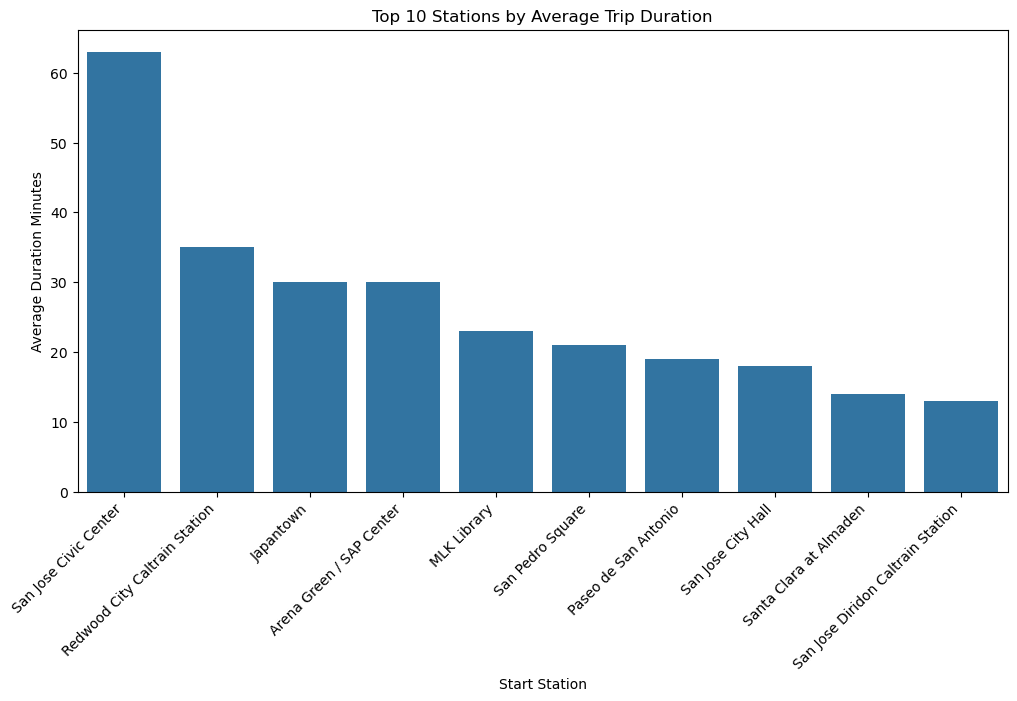

In [24]:
plt.figure(figsize=(12, 6))

sns.barplot(top10_stations_avg_trip,
            x='start_station_name', 
            y='avg_duration_minutes')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Stations by Average Trip Duration')
plt.xlabel('Start Station')
plt.ylabel('Average Duration Minutes')


plt.show()

In [28]:
top10_stations_total_trip_minutes = top10_stations.sort_values(
    by='total_duration_minutes', ascending=False
)

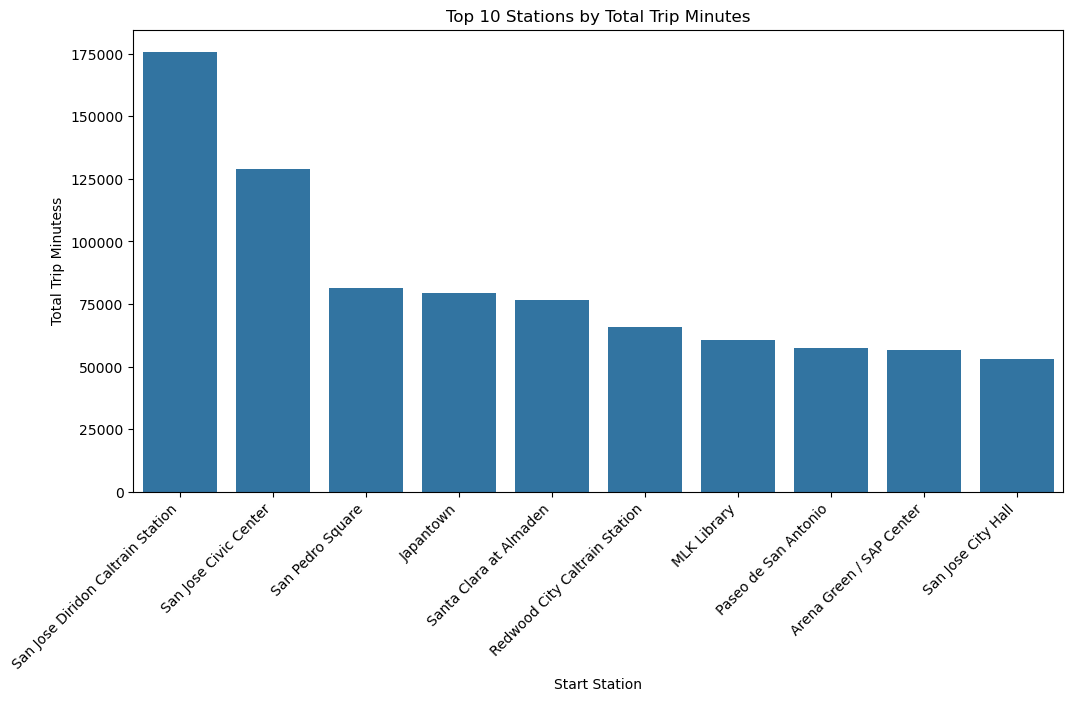

In [30]:
plt.figure(figsize=(12, 6))

sns.barplot(top10_stations_total_trip_minutes,
            x='start_station_name', 
            y='total_duration_minutes')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Stations by Total Trip Minutes')
plt.xlabel('Start Station')
plt.ylabel('Total Trip Minutess')


plt.show()